In [ ]:
# data => Salary_Data.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Salary_Data.csv")
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
df.shape

(30, 2)

In [4]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [5]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [6]:
x = df[['YearsExperience']]
y = df['Salary']

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lr = LinearRegression()

In [9]:
lr.fit(x, y)

LinearRegression()

In [10]:
lr.score(x, y)

0.9569566641435086

In [11]:
# polynomial

In [12]:
from sklearn.preprocessing import PolynomialFeatures

In [13]:
poly = PolynomialFeatures(degree = 13)

In [14]:
x_poly = poly.fit_transform(x)

In [15]:
x_poly

array([[1.00000000e+00, 1.10000000e+00, 1.21000000e+00, 1.33100000e+00,
        1.46410000e+00, 1.61051000e+00, 1.77156100e+00, 1.94871710e+00,
        2.14358881e+00, 2.35794769e+00, 2.59374246e+00, 2.85311671e+00,
        3.13842838e+00, 3.45227121e+00],
       [1.00000000e+00, 1.30000000e+00, 1.69000000e+00, 2.19700000e+00,
        2.85610000e+00, 3.71293000e+00, 4.82680900e+00, 6.27485170e+00,
        8.15730721e+00, 1.06044994e+01, 1.37858492e+01, 1.79216039e+01,
        2.32980851e+01, 3.02875107e+01],
       [1.00000000e+00, 1.50000000e+00, 2.25000000e+00, 3.37500000e+00,
        5.06250000e+00, 7.59375000e+00, 1.13906250e+01, 1.70859375e+01,
        2.56289062e+01, 3.84433594e+01, 5.76650391e+01, 8.64975586e+01,
        1.29746338e+02, 1.94619507e+02],
       [1.00000000e+00, 2.00000000e+00, 4.00000000e+00, 8.00000000e+00,
        1.60000000e+01, 3.20000000e+01, 6.40000000e+01, 1.28000000e+02,
        2.56000000e+02, 5.12000000e+02, 1.02400000e+03, 2.04800000e+03,
        4.096

In [16]:
lr.fit(x_poly, y)

LinearRegression()

In [17]:
lr.score(x_poly, y)

0.9830349074924566

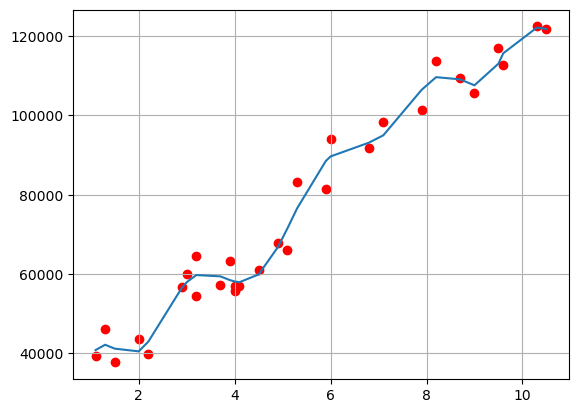

In [20]:
plt.scatter(x, y, color = 'red')
plt.plot(x, lr.predict(x_poly))
plt.grid()

In [21]:
# BostonHousing.csv
# https://mitu.co.in

In [22]:
# using forward feature selection build the multiple regression model
# do the cross validation as well
# get the r2 score and me 
# response variable -> medv

In [23]:
df = pd.read_csv("BostonHousing.csv")
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [24]:
df.shape

(506, 14)

In [25]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [26]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [27]:
x = df[['zn', 'indus', 'chas']]
y = df['crim']

In [28]:
x;

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lr = LinearRegression()

In [31]:
lr.fit(x, y)

LinearRegression()

In [32]:
lr.score(x, y)

0.1723262468010952